In [1]:
import warnings
warnings.filterwarnings("ignore")

# Extracting Dataset

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df=pd.read_csv('C:\workspace\Credit-Risk-Modeling\dataset\credit_risk_dataset.csv')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
num_features=['person_age', 'person_income','person_emp_length', 'loan_amnt',
       'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
cat_features=['person_home_ownership','loan_intent', 'loan_grade','cb_person_default_on_file']
target='loan_status'

len(num_features)+len(cat_features)

11

# Overview of missing data

In [7]:
df.isna().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [8]:
df.loc[df.isna().any(axis=1)==True]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [9]:
df[df['loan_int_rate'].isna()==True]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [10]:
df['loan_int_rate'].isna().value_counts()

loan_int_rate
False    29465
True      3116
Name: count, dtype: int64

In [11]:
df[df['person_emp_length'].isna()==True]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [12]:
df['person_emp_length'].isna().value_counts()

person_emp_length
False    31686
True       895
Name: count, dtype: int64

## Investigating the relationshib between `employment length` and other features

- We have used regression tree.

- employment length is target.

- Rest of the features are the features of the regression tree.

In [13]:
X=pd.get_dummies(df[num_features+cat_features].dropna())
y=df.dropna()['loan_status']

In [14]:
from sklearn.tree import DecisionTreeRegressor 
model=DecisionTreeRegressor().fit(X,y)

In [15]:
feature_score=pd.concat([pd.Series(model.feature_names_in_),pd.Series(model.feature_importances_)],axis=1)
feature_score.columns=['features','score']
feature_score.sort_values('score',ascending=False,inplace=True)
feature_score.index=range(len(feature_score))
feature_score.head(10)

,features,score
0,loan_percent_income,0.231038
1,loan_int_rate,0.171803
2,person_home_ownership_RENT,0.128441
3,person_income,0.126069
4,person_emp_length,0.056328
5,person_age,0.043858
6,loan_amnt,0.041786
7,loan_intent_MEDICAL,0.039608
8,loan_intent_DEBTCONSOLIDATION,0.035185
9,cb_person_cred_hist_length,0.028368


In [16]:
model.feature_names_in_

array(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL',
       'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'], dtype=object)

# Overview of portion of defult loans vs good ones

In [17]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

# Investigating Categorical and Numerical features

In [18]:
df['cb_person_default_on_file'].value_counts(normalize=True)

cb_person_default_on_file
N    0.82367
Y    0.17633
Name: proportion, dtype: float64

In [19]:
cat_features=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
num_features=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

In [20]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [21]:
df[num_features]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,0.59,3
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30
32577,54,120000,4.0,17625,7.49,0.15,19
32578,65,76000,3.0,35000,10.99,0.46,28
32579,56,150000,5.0,15000,11.48,0.10,26


In [22]:
df[cat_features]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [23]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [24]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [25]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [26]:
target='loan_status'
df[target]=df[target].astype('category')

In [27]:
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split

In [28]:
df[target].astype('category').value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

<Axes: >

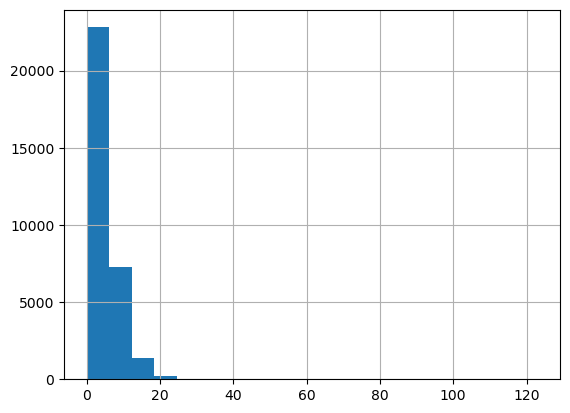

In [29]:
df['person_emp_length'].hist(bins=20)

In [30]:
df[df['person_emp_length']>40]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25


In [31]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [32]:
import matplotlib.pyplot as plt
temp_df=pd.DataFrame(df[['loan_intent','loan_status']].value_counts()).reset_index()
temp_df.sort_values('loan_intent',inplace=True)
temp_df.index=range(len(temp_df))
temp_df2=temp_df.groupby('loan_intent').agg({'count':'sum'}).reset_index()
temp_df2.columns=['loan_intent','sum_count']
temp_df=temp_df.merge(temp_df2,on=['loan_intent'])
temp_df=temp_df[temp_df['loan_status']==1]
temp_df.index=range(len(temp_df))
temp_df['default_rate']=temp_df['count']/temp_df['sum_count']
temp_df.sort_values('default_rate',inplace=True)
temp_df.index=range(len(temp_df))
temp_df.drop(['loan_status','count','sum_count'],axis=1,inplace=True)
temp_df

,loan_intent,default_rate
0,VENTURE,0.148103
1,EDUCATION,0.172168
2,PERSONAL,0.198877
3,HOMEIMPROVEMENT,0.261026
4,MEDICAL,0.267007
5,DEBTCONSOLIDATION,0.285879


In [33]:
temp_df=pd.DataFrame(df[['loan_grade','loan_status']].value_counts()).reset_index()
temp_df.sort_values('loan_grade',inplace=True)
temp_df.index=range(len(temp_df))
temp_df2=temp_df.groupby('loan_grade').agg({'count':'sum'}).reset_index()
temp_df2.columns=['loan_grade','sum_count']
temp_df=temp_df.merge(temp_df2,on=['loan_grade'])
temp_df=temp_df[temp_df['loan_status']==1]
temp_df.index=range(len(temp_df))
temp_df['default_rate']=temp_df['count']/temp_df['sum_count']
temp_df.sort_values('default_rate',inplace=True)
temp_df.index=range(len(temp_df))
temp_df.drop(['loan_status','count','sum_count'],axis=1,inplace=True)
temp_df

,loan_grade,default_rate
0,A,0.099564
1,B,0.162760
2,C,0.207340
3,D,0.590458
4,E,0.644191
5,F,0.705394
6,G,0.984375


In [34]:
temp_df=pd.DataFrame(df[['person_home_ownership','loan_status']].value_counts()).reset_index()
temp_df.sort_values('person_home_ownership',inplace=True)
temp_df.index=range(len(temp_df))
temp_df2=temp_df.groupby('person_home_ownership').agg({'count':'sum'}).reset_index()
temp_df2.columns=['person_home_ownership','sum_count']
temp_df=temp_df.merge(temp_df2,on=['person_home_ownership'])
temp_df=temp_df[temp_df['loan_status']==1]
temp_df.index=range(len(temp_df))
temp_df['default_rate']=temp_df['count']/temp_df['sum_count']
temp_df.sort_values('default_rate',inplace=True)
temp_df.index=range(len(temp_df))
temp_df.drop(['loan_status','count','sum_count'],axis=1,inplace=True)
temp_df

,person_home_ownership,default_rate
0,OWN,0.074690
1,MORTGAGE,0.125707
2,OTHER,0.308411
3,RENT,0.315700


In [35]:
temp_df=pd.DataFrame(df[['cb_person_default_on_file','loan_status']].value_counts()).reset_index()
temp_df.sort_values('cb_person_default_on_file',inplace=True)
temp_df.index=range(len(temp_df))
temp_df2=temp_df.groupby('cb_person_default_on_file').agg({'count':'sum'}).reset_index()
temp_df2.columns=['cb_person_default_on_file','sum_count']
temp_df=temp_df.merge(temp_df2,on=['cb_person_default_on_file'])
temp_df=temp_df[temp_df['loan_status']==1]
temp_df.index=range(len(temp_df))
temp_df['default_rate']=temp_df['count']/temp_df['sum_count']
temp_df.sort_values('default_rate',inplace=True)
temp_df.index=range(len(temp_df))
temp_df.drop(['loan_status','count','sum_count'],axis=1,inplace=True)
temp_df

,cb_person_default_on_file,default_rate
0,N,0.183932
1,Y,0.378068


In [36]:
df[num_features]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,0.59,3
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30
32577,54,120000,4.0,17625,7.49,0.15,19
32578,65,76000,3.0,35000,10.99,0.46,28
32579,56,150000,5.0,15000,11.48,0.10,26


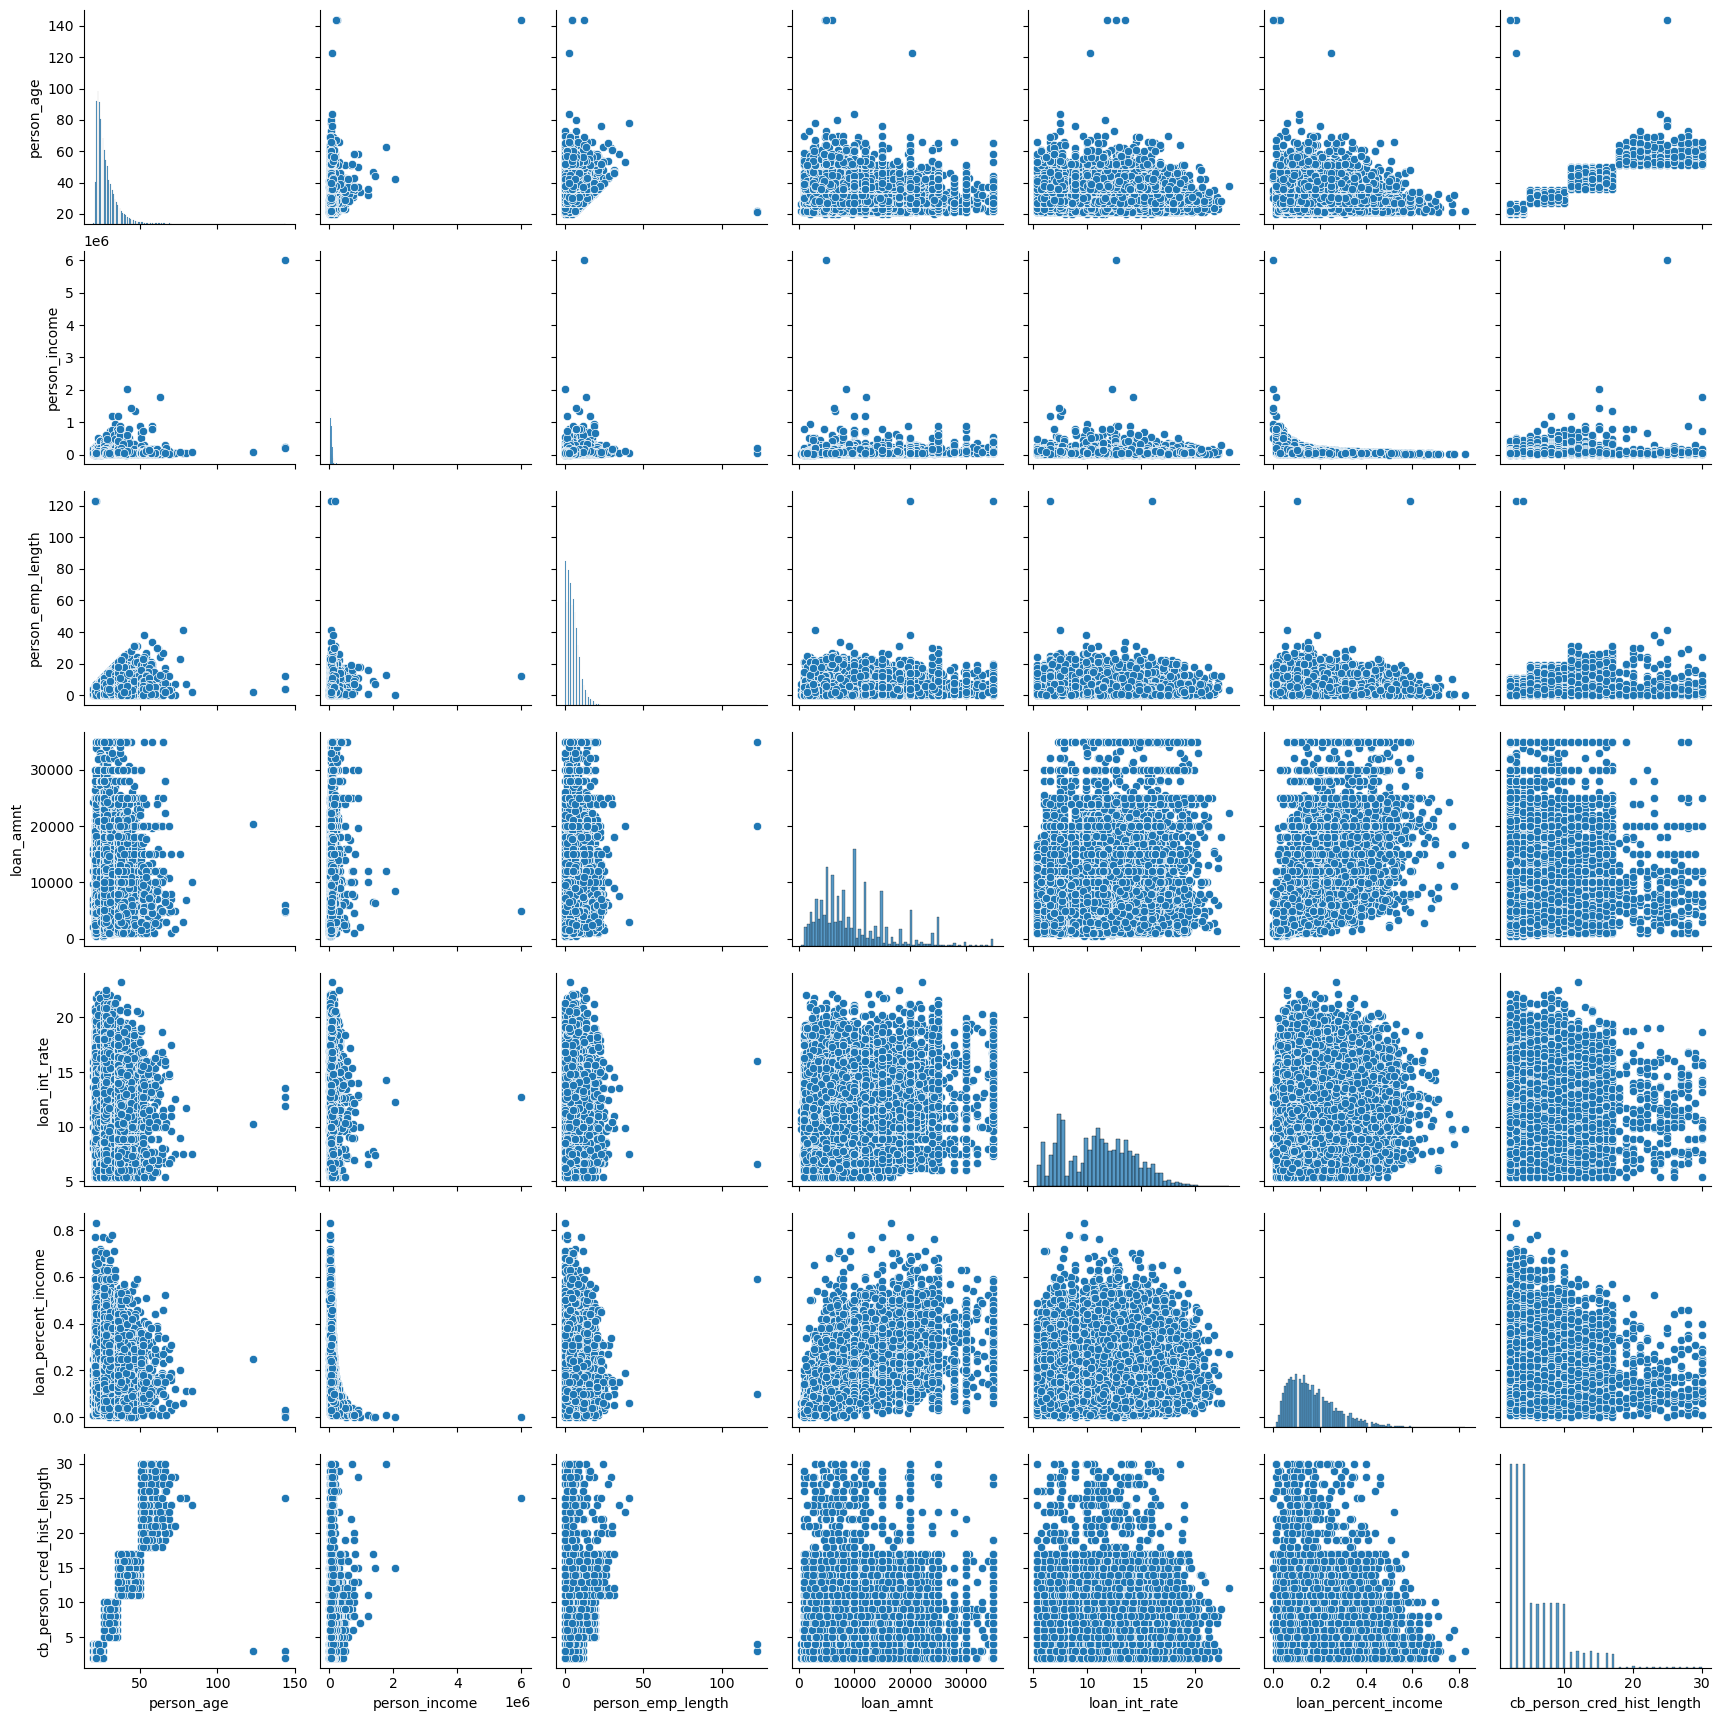

In [37]:
import seaborn as sns
sns.pairplot(df[num_features].dropna())

<Axes: >

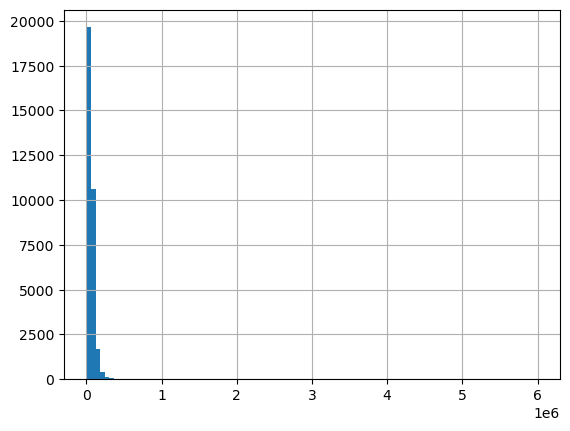

In [38]:
df['person_income'].hist(bins=100)

In [39]:
df['person_income'].describe()

count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64

<Axes: >

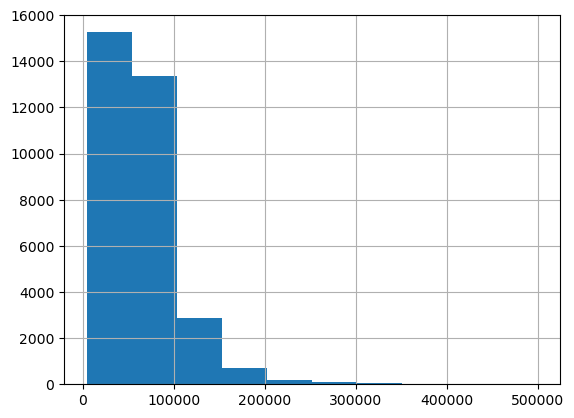

In [40]:
df.loc[df['person_income']<500000,'person_income'].hist()

# Identifying outliers and extreme values

In [41]:
df[num_features]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,0.59,3
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30
32577,54,120000,4.0,17625,7.49,0.15,19
32578,65,76000,3.0,35000,10.99,0.46,28
32579,56,150000,5.0,15000,11.48,0.10,26


## large person age

<Axes: >

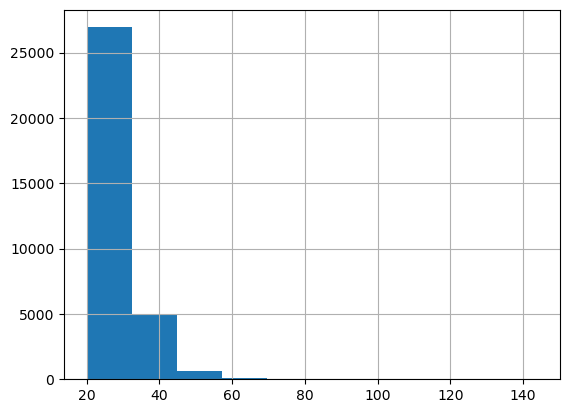

In [42]:
df['person_age'].hist()

In [43]:
df[df['person_age']>80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


- suspricious observations are `[81,183,575,747,32297]`.

## person income 

<Axes: >

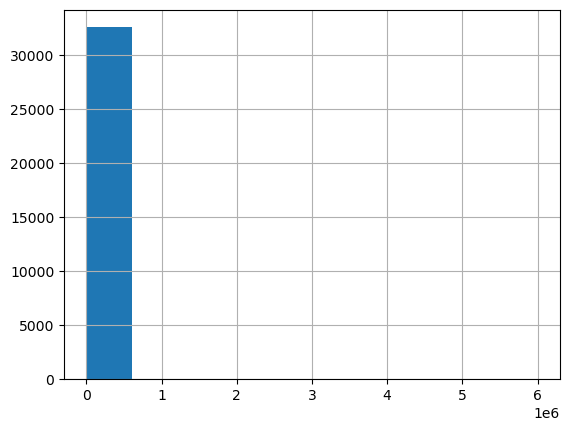

In [44]:
df['person_income'].hist()

In [45]:
df['person_income'].describe()

count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64

<Axes: >

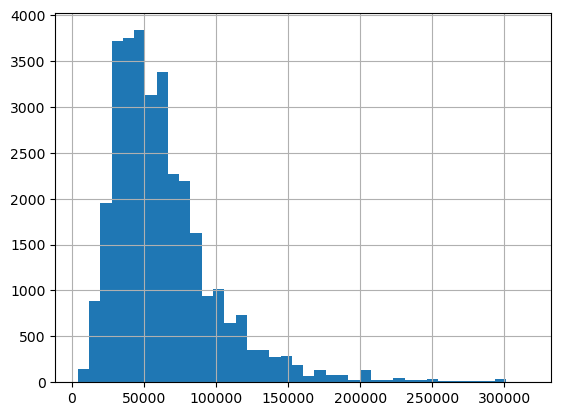

In [46]:
df.loc[df['person_income']<320000,'person_income'].hist(bins=40)

In [47]:
df[df['person_income']>500000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,N,8
17834,34,948000,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.00,N,7
17840,35,648000,MORTGAGE,6.0,PERSONAL,E,10000,17.19,1,0.02,Y,8
17846,30,504000,RENT,4.0,DEBTCONSOLIDATION,B,3000,11.36,0,0.01,N,9
18635,31,636000,RENT,2.0,DEBTCONSOLIDATION,B,17500,11.48,0,0.03,N,10
18917,35,510000,RENT,1.0,PERSONAL,C,1800,13.48,0,0.00,N,6
21462,33,612000,RENT,3.0,DEBTCONSOLIDATION,C,5950,12.73,0,0.01,Y,9
21958,34,564000,RENT,2.0,MEDICAL,A,6000,7.14,0,0.01,N,5
23429,31,552000,RENT,0.0,PERSONAL,A,8000,7.29,0,0.01,N,10
23431,30,648000,RENT,NaN,DEBTCONSOLIDATION,C,8000,12.73,0,0.01,Y,10


# Training and testing split 

In [48]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,random_state=123,stratify=df['loan_status'])

# Handling Categorical data

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder().fit(train[cat_features])
X_train_cat=ohe.transform(train[cat_features]).toarray()
X_test_cat=ohe.transform(test[cat_features]).toarray()

# Handling numerical features

In [50]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer().fit(train[num_features])
X_train_num=pt.transform(train[num_features])
X_test_num=pt.transform(test[num_features])

In [51]:
X_train=np.concatenate((X_train_num,X_train_cat),axis=1)
X_test=np.concatenate((X_test_num,X_test_cat),axis=1)

In [52]:
X_test.shape,X_train.shape

((8146, 26), (24435, 26))

# Target Engineering

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder().fit(train['loan_status'].astype('category'))
y_train=le.transform(train['loan_status'].astype('category'))
y_test=le.transform(test['loan_status'].astype('category'))

# Handling missing variables (Imputation)

In [54]:
from sklearn.impute import KNNImputer
knn_imp=KNNImputer().fit(X_train)
X_train=knn_imp.transform(X_train)
X_test=knn_imp.transform(X_test)

# Saving the dataset

# Bench mark

In [55]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(X_train,y_train)
pred=model.predict(X_test)

In [56]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,recall_score,roc_curve

In [57]:
accuracy_score(y_test,pred)

0.8962681070464031

In [58]:
recall_score(y_test,pred)

0.7850309510410804

In [59]:
confusion_matrix(y_test,pred)

array([[5906,  463],
       [ 382, 1395]], dtype=int64)

In [60]:
roc_auc_score(y_test,pred)

0.8561675402088744

In [61]:
model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

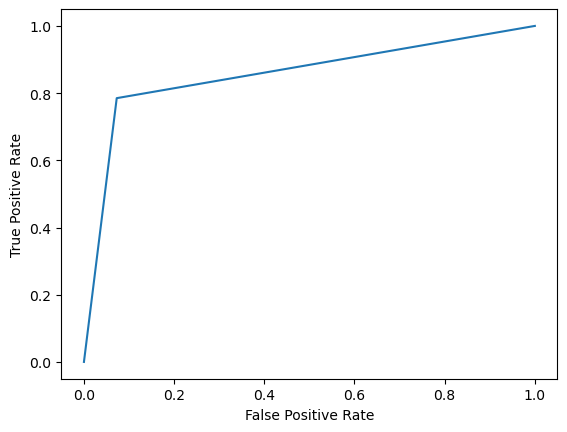

In [62]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
pd.Series(model.predict_proba(X_test)[:,0]).value_counts()

1.0    6288
0.0    1858
Name: count, dtype: int64